## Adam Mischke
## CSCI 4850/5850 - Neural Networks
## Open Lab 1 - Single Layer Networks
## Due: Thu. Feb. 15 by 11:00pm

### 1. Imports

In [1]:
# imports

# for file in
import os

# pandas
import pandas as pd

# numpy
import numpy as np

# neural net tools
import keras
# check Using TensorFlow backend.

# for plotting and graphing
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### 2. Single Layer Agent Class

In [2]:
class SingleLayerAgent:
    
    ## initialization:
    def __init__(self, filename):
        
        # sequential uses a feed-forward nn
        self.model = keras.Sequential()
        
        # load the data from the filename
        self.data = np.array(pd.read_table(filename,
                    delim_whitespace=True,
                    header=None))
        
        # set the number of columns from the shape
        self.columns = self.data.shape[1] - 1
        
        # input training vectors, first 4 columns, all 150 rows
        self.X = self.data[:,0:self.columns]
        
        # grabbing a single vector of the last column
        # these are the class labels of the data set
        self.labels = self.data[:,self.columns]
        
        # convert the integer class labels to a
        # categorial or "one-hot" encoding
        unique_labels = np.unique(self.labels)
        self.Y = keras.utils.to_categorical(self.labels,
                                            len(unique_labels))
        
        # input size - 4
        input_size = self.X.shape[1]

        # output size - 3
        output_size = self.Y.shape[1]

        # using the sigmoid activation function:
        self.model.add(keras.layers.Dense(output_size,
                                          activation='sigmoid',
                                          input_shape=[input_size]))
        
    # show the summary
    def summary(self):
        self.model.summary()
        
    
    def compile_model(self, learning_rate):
        # prep the model for learning
        # uses the Mean-Squared-Error 
        self.model.compile(loss=keras.losses.mse,
                      optimizer=keras.optimizers.SGD(lr=learning_rate),
                      metrics=['accuracy'])
        
    
    # doesn't show the weights, but sets random ones
    def get_weights(self):
        # check the bias and connection weights
        self.model.get_weights()
        
    # trains depending on how many epochs
    def train(self, epochs, verbose):
        # training parameters
        batch_size = 16
        validation_split = 0.5

        self.history = self.model.fit(self.X, self.Y,
                           batch_size = batch_size,
                           epochs = epochs,
                           verbose = verbose,
                           validation_split = validation_split)

    # plots the model with the training results
    def plot(self):
        plt.figure(1, figsize=(15,15))

        # summarize history for accuracy
        plt.subplot(311)
        plt.plot(self.history.history['acc'])
        plt.plot(self.history.history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('value accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')

        # summarize history for loss
        plt.subplot(312)
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('value loss')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.show()
        
    # displays the performance for the model
    def show_performance(self):
        score = self.model.evaluate(self.X, self.Y, verbose=True)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

## Iris Single Layer Agent:

In [51]:
# training data
iris_local = os.path.join('data', 'iris-data.txt')

# instantiate our single layer agent with the filename above
iris = SingleLayerAgent(filename = iris_local)
iris.summary()   # show the summary of our agent

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [52]:
# compile the model with a specified learning rate
iris.compile_model(learning_rate = 0.5)

# set random weights
iris.get_weights()

# change second parameter to see training
iris.train(epochs = 300, verbose = False)

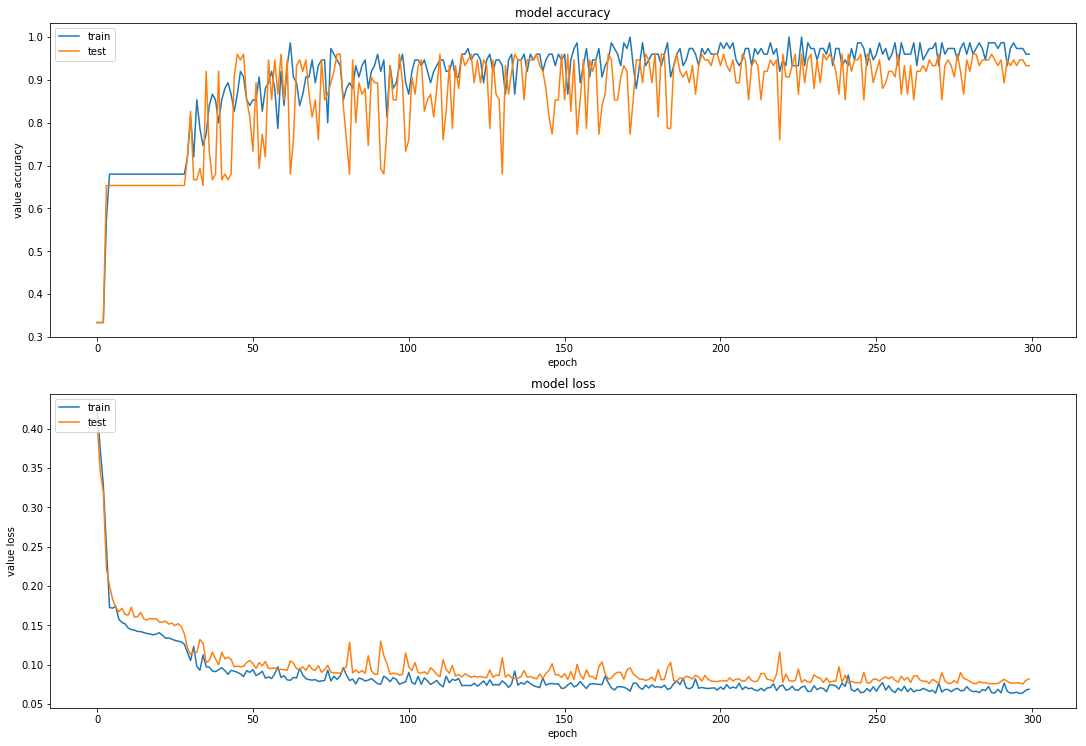

In [53]:
iris.plot()    # plot our results

In [54]:
iris.show_performance()    # display the performance of our agent

150/150 [==============================] - 0s 91us/step
Test loss: 0.0752690557639
Test accuracy: 0.960000003974


-------------------------

## Breast Cancer Single Layer Agent:

In [12]:
# training data
cancer_url = 'https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt'
cancer_local = os.path.join('data', 'WDBC.txt')

# instantiate our single layer agent with the filename above
cancer = SingleLayerAgent(filename = cancer_local)
cancer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [55]:
# compile the model with a specified learning rate
cancer.compile_model(learning_rate = 0.999)

# set random weights
cancer.get_weights()

# change second parameter to see training
cancer.train(epochs = 200, verbose = False)

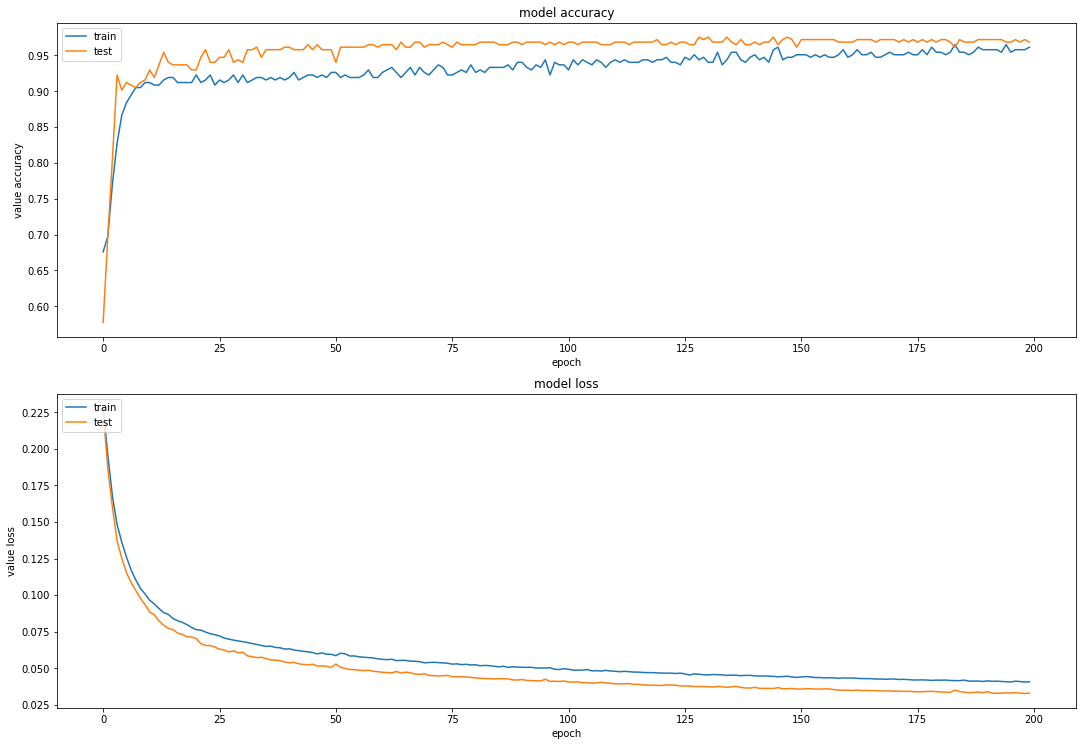

In [14]:
cancer.plot()    # plot our results

In [56]:
cancer.show_performance()    # display the performance of our agent

568/568 [==============================] - 0s 66us/step
Test loss: 0.036411533447
Test accuracy: 0.966549295775
